# Data Science: explorando e analisando dados

## 01. Conhecendo os dados

In [2]:
import pandas as pd

In [3]:
notas = pd.read_csv('data/ratings.csv')
notas.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [4]:
notas.shape

(100836, 4)

In [5]:
notas.columns

Index(['userId', 'movieId', 'rating', 'timestamp'], dtype='object')

In [6]:
notas.columns = ['usuarioId', 'filmeId', 'nota', 'momento']

In [7]:
notas.columns

Index(['usuarioId', 'filmeId', 'nota', 'momento'], dtype='object')

In [8]:
notas['nota'].unique()

array([4. , 5. , 3. , 2. , 1. , 4.5, 3.5, 2.5, 0.5, 1.5])

In [9]:
notas['nota'].value_counts()

nota
4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: count, dtype: int64

In [10]:
notas['nota'].mean()

np.float64(3.501556983616962)

<Axes: ylabel='Frequency'>

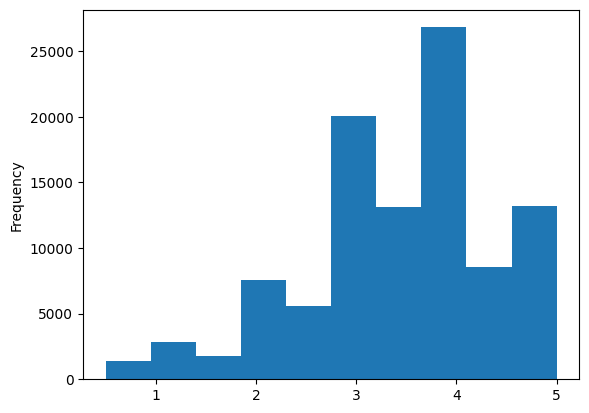

In [11]:
notas['nota'].plot(kind='hist')

In [12]:
mediana = notas['nota'].median()
media = notas['nota'].mean()

print('A mediana é:', mediana)
print('A média é:', media)

A mediana é: 3.5
A média é: 3.501556983616962


In [13]:
import seaborn as sns

<Axes: ylabel='nota'>

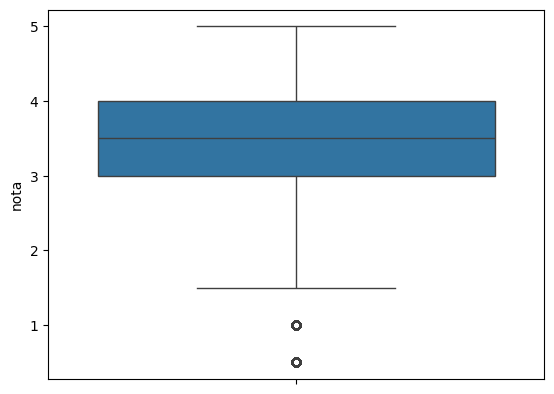

In [14]:
sns.boxplot(notas['nota'])

## 02. Analisando os dados

In [15]:
filmes = pd.read_csv('data/movies.csv')
filmes.columns = ['filmeId', 'titulo', 'generos']
filmes.head()

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [16]:
notas.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [17]:
notas.query("filmeId == 1")['nota'].mean()

np.float64(3.9209302325581397)

In [18]:
notas.query("filmeId == 2")['nota'].mean()

np.float64(3.4318181818181817)

In [19]:
medias_por_filme = notas.groupby(by='filmeId')['nota'].mean()
medias_por_filme.head()

filmeId
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: nota, dtype: float64

<Axes: ylabel='Frequency'>

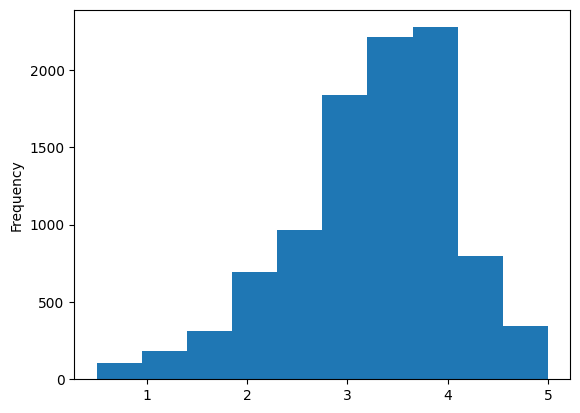

In [20]:
medias_por_filme.plot(kind='hist')

[pandas API reference](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.query.html)

<Axes: ylabel='nota'>

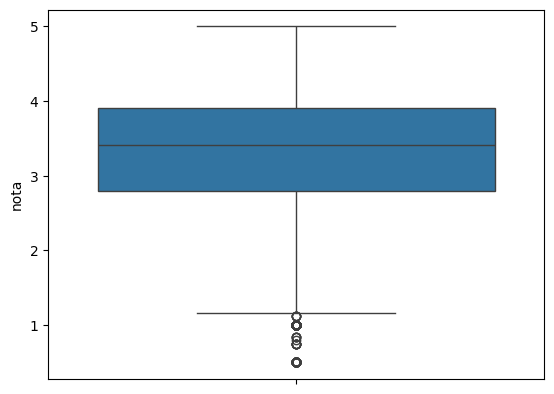

In [21]:
sns.boxplot(medias_por_filme)

In [22]:
medias_por_filme.describe()

count    9724.000000
mean        3.262448
std         0.869874
min         0.500000
25%         2.800000
50%         3.416667
75%         3.911765
max         5.000000
Name: nota, dtype: float64

[seaborn charts](https://seaborn.pydata.org/examples/index.html)

In [23]:
!pip install matplotlib
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Histograma das médias dos filmes')

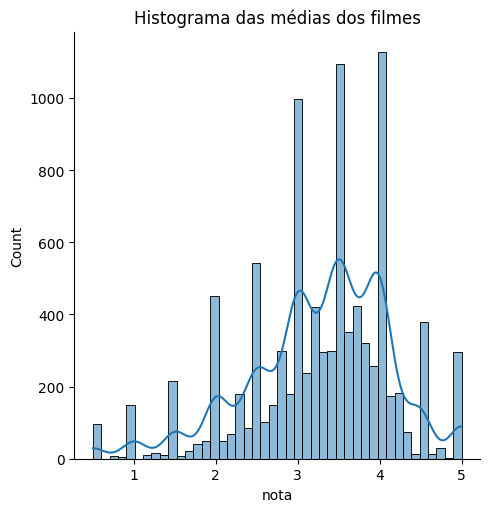

In [24]:
sns.displot(medias_por_filme, kde=True)
plt.title('Histograma das médias dos filmes')

[Exploratory Data Analysis](https://en.wikipedia.org/wiki/Exploratory_data_analysis)

## 03. Entendendo os tipos de variáveis

In [25]:
tmdb = pd.read_csv('data/tmdb_5000_movies.csv')
tmdb.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


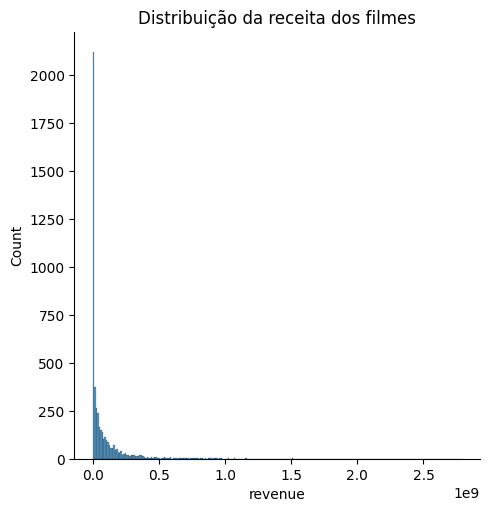

In [26]:
sns.displot(tmdb['revenue'])
plt.title(label='Distribuição da receita dos filmes')
plt.show()

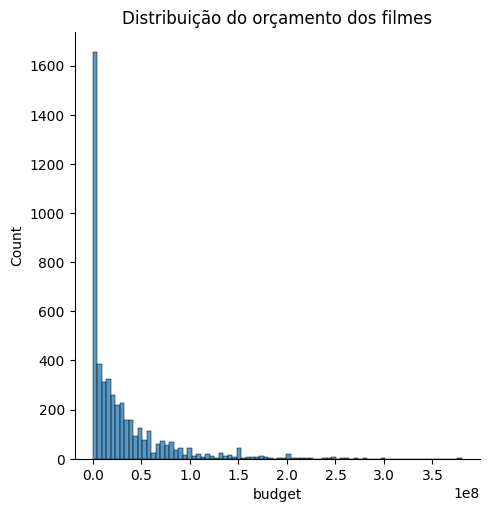

In [27]:
sns.displot(tmdb['budget'])
plt.title(label='Distribuição do orçamento dos filmes')
plt.show()

In [28]:
tmdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [29]:
tmdb.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


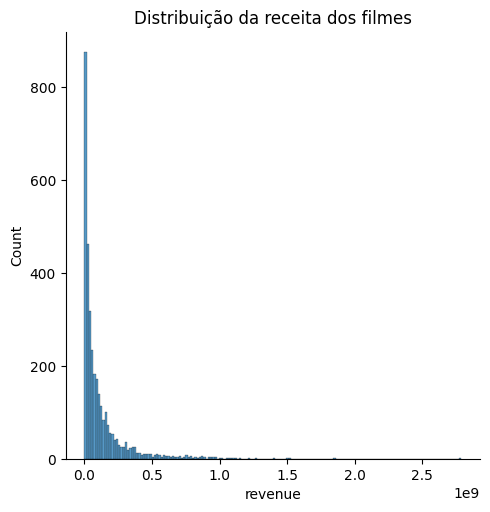

In [30]:
com_faturamento = tmdb.query('revenue > 0')
sns.displot(com_faturamento['revenue'])
plt.title(label='Distribuição da receita dos filmes')
plt.show()

In [31]:
tmdb['original_language'].unique()

array(['en', 'ja', 'fr', 'zh', 'es', 'de', 'hi', 'ru', 'ko', 'te', 'cn',
       'it', 'nl', 'ta', 'sv', 'th', 'da', 'xx', 'hu', 'cs', 'pt', 'is',
       'tr', 'nb', 'af', 'pl', 'he', 'ar', 'vi', 'ky', 'id', 'ro', 'fa',
       'no', 'sl', 'ps', 'el'], dtype=object)

In [32]:
tmdb['original_language'].mode()

0    en
Name: original_language, dtype: object

In [33]:
tmdb['original_language'].value_counts()

original_language
en    4505
fr      70
es      32
zh      27
de      27
hi      19
ja      16
it      14
cn      12
ko      11
ru      11
pt       9
da       7
sv       5
nl       4
fa       4
th       3
he       3
id       2
cs       2
ta       2
ro       2
ar       2
te       1
hu       1
xx       1
af       1
is       1
tr       1
vi       1
pl       1
nb       1
ky       1
no       1
sl       1
ps       1
el       1
Name: count, dtype: int64

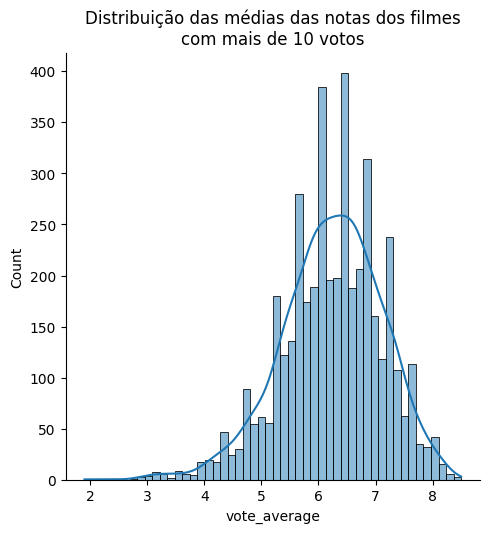

In [34]:
mais_de_10_votos = tmdb.query('vote_count > 10')
sns.displot(mais_de_10_votos['vote_average'], kde=True)
plt.title(label='Distribuição das médias das notas dos filmes\ncom mais de 10 votos')
plt.show()

### Para saber mais: classificando as variáveis

Variáveis são caracteríticas, atributos ou quantidades de uma amostra ou população que podem ser mensuradas, contadas ou categorizadas. Elas são fundamentais para descrever e entender os fenômenos em estudo. As variáveis podem ser classificadas basicamente em dois tipos: **qualitativas** (ou categóricas) e **quantitativas** (ou numéricas).

Na imagem abaixo, podemos observar os diferentes tipos de variáveis, seja por sua natureza, quanto pelas suas derivações:

![img](https://cdn3.gnarususercontent.com.br/3675-data-science-analise-exploratoria/Imagens%20das%20atividades/Aula03-img01.png)

#### Variáveis Qualitativas

Também conhecidas como categóricas, representam características que não podem ser medidas numericamente, mas podem ser categorizadas, ou seja, representam uma classificação. Estas variáveis podem ser **nominais** ou **ordinais**.

> Observação: a depender dos tipos dos dados, é possível que uma **variável qualitativa** possa ser representada por números. Por exemplo, uma coluna que representa uma característica em que 0 simboliza "Não" e 1 simboliza "Sim". Os números aqui servem para resumir a representação dos dados e não devem ser utilizados para cálculo, por exemplo, de média.

##### Nominal

Uma variável qualitativa nominal é aquela que classifica os elementos em classes ou categorias em relação ao tipo do dado representado. Ela não possui uma relação de grandeza ou ordem dos dados.

**Exemplos**: Nome de produtos, departamentos, métodos de pagamento ou variáveis geográficas, como, cidade, estado e região.

##### Ordinal

Uma variável qualitativa ordinal também é aquela que classifica os elementos em classes ou categorias, porém existe uma **ordem natural ou hierárquica** entre as categorias.

**Exemplos**: grau de escolaridade (ensino infantil, ensino fundamental, ensino médio), nível de satisfação do cliente (insatisfeito, neutro e satisfeito) e nível socioeconômico.

#### Variáveis Quantitativas

Representam medidas numéricas ou quantidades observáveis que podem ser expressas em números. Elas são resultantes de **contagens** (conjunto finito de valores) ou **mensurações** (conjunto infinito de valores). Estas variáveis podem ser **discretas** ou **contínuas**.

##### Discreta

Uma variável quantitativa discreta é aquela que apresenta valores que podem ser contados e geralmente inteiros.

**Exemplos**: quantidade de produto vendido, número de cômodos em uma casa e idade.

##### Contínua

Uma variável quantitativa contínua é aquela que apresenta valores que podem assumir qualquer valor dentro de um intervalo específico e geralmente são expressos como números reais.

**Exemplos**: peso de um produto, altura de uma pessoa, tempo e temperatura de um experimento.

---

Compreender as variáveis e onde elas se posicionam dentro dessas classificações facilita bastante na escolha das técnicas, visuais e análises para cada tipo de dado. Por isso, quando estiver mexendo com conjuntos de dados em seus projetos, analise o que cada coluna pode representar e como poderá te auxiliar na investigação por meio da ciência de dados.

## 04. Visualizando os dados

In [35]:
tmdb['original_language'].value_counts().index

Index(['en', 'fr', 'es', 'zh', 'de', 'hi', 'ja', 'it', 'cn', 'ko', 'ru', 'pt',
       'da', 'sv', 'nl', 'fa', 'th', 'he', 'id', 'cs', 'ta', 'ro', 'ar', 'te',
       'hu', 'xx', 'af', 'is', 'tr', 'vi', 'pl', 'nb', 'ky', 'no', 'sl', 'ps',
       'el'],
      dtype='object', name='original_language')

In [36]:
tmdb['original_language'].value_counts().values

array([4505,   70,   32,   27,   27,   19,   16,   14,   12,   11,   11,
          9,    7,    5,    4,    4,    3,    3,    2,    2,    2,    2,
          2,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
          1,    1,    1,    1])

In [37]:
contagem_de_lingua = tmdb['original_language'].value_counts().to_frame().reset_index()
contagem_de_lingua.columns = ['original_language', 'total']
contagem_de_lingua.head()

,original_language,total
0,en,4505
1,fr,70
2,es,32
3,zh,27
4,de,27


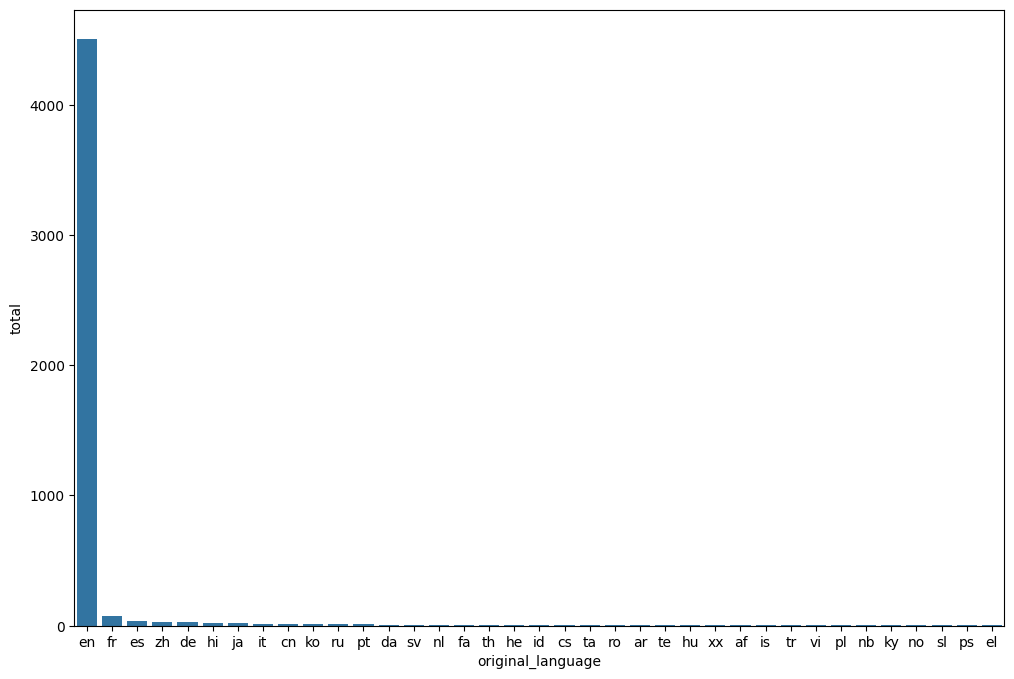

In [38]:
plt.figure(figsize=(12, 8))
sns.barplot(data=contagem_de_lingua, x='original_language', y='total')
plt.show()

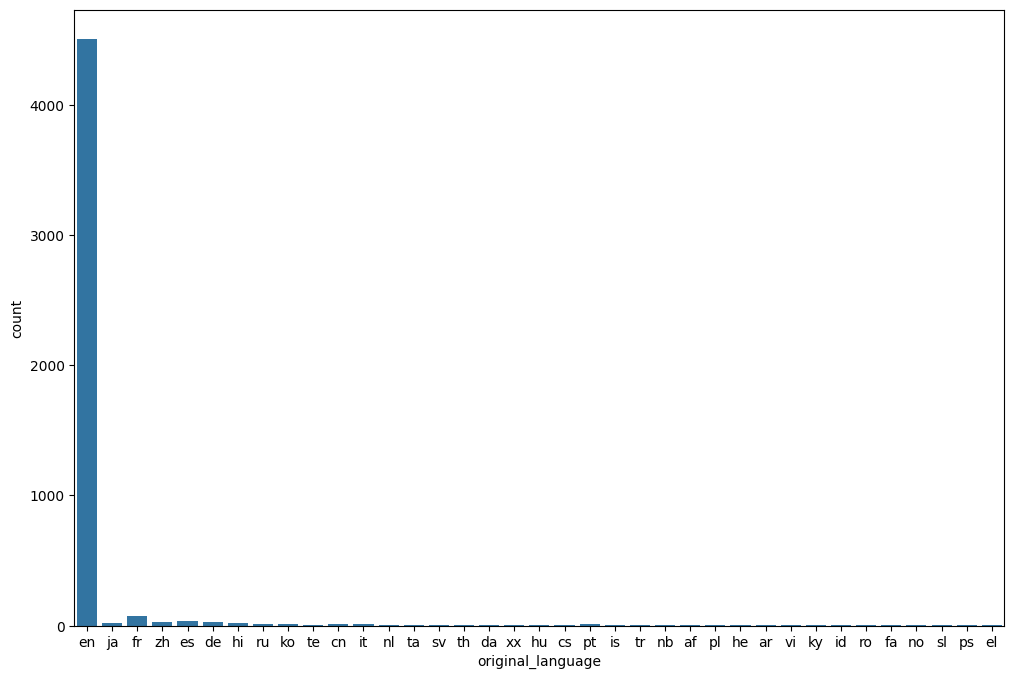

In [39]:
plt.figure(figsize=(12, 8))
sns.countplot(data=tmdb, x='original_language')
plt.show()

<Axes: ylabel='total'>

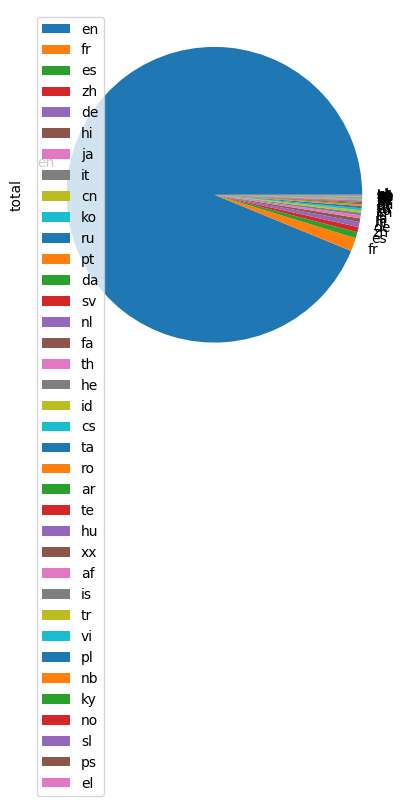

In [40]:
# show de horror que é o gráfico de pizza
contagem_de_lingua.plot(kind='pie',
                        y='total',
                        labels=contagem_de_lingua['original_language'])

In [41]:
total_por_lingua = tmdb['original_language'].value_counts()
total_geral = total_por_lingua.sum()
total_de_ingles = total_por_lingua.loc['en']
total_do_resto = total_geral - total_de_ingles
print(total_geral, total_de_ingles, total_do_resto)

4803 4505 298


In [42]:
dados = dict(lingua=['ingles', 'outros'],
             total=[total_de_ingles, total_do_resto])
dados = pd.DataFrame(dados)
dados

,lingua,total
0,ingles,4505
1,outros,298


<Axes: xlabel='lingua', ylabel='total'>

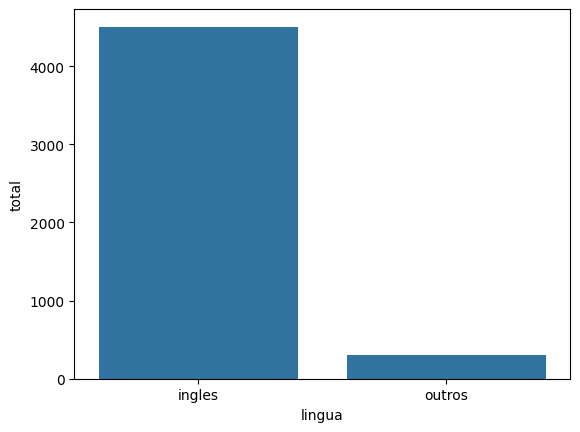

In [43]:
sns.barplot(data=dados, x='lingua', y='total')

<Axes: ylabel='total'>

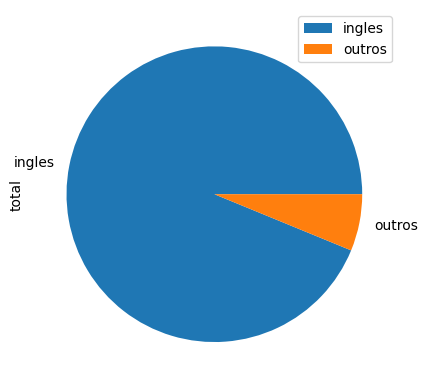

In [44]:
dados.plot(kind='pie', labels=dados['lingua'], y='total')

In [45]:
total_de_outros_filmes_por_lingua = tmdb.query("original_language != 'en'")['original_language'].value_counts()
total_de_outros_filmes_por_lingua.head()

original_language
fr    70
es    32
zh    27
de    27
hi    19
Name: count, dtype: int64

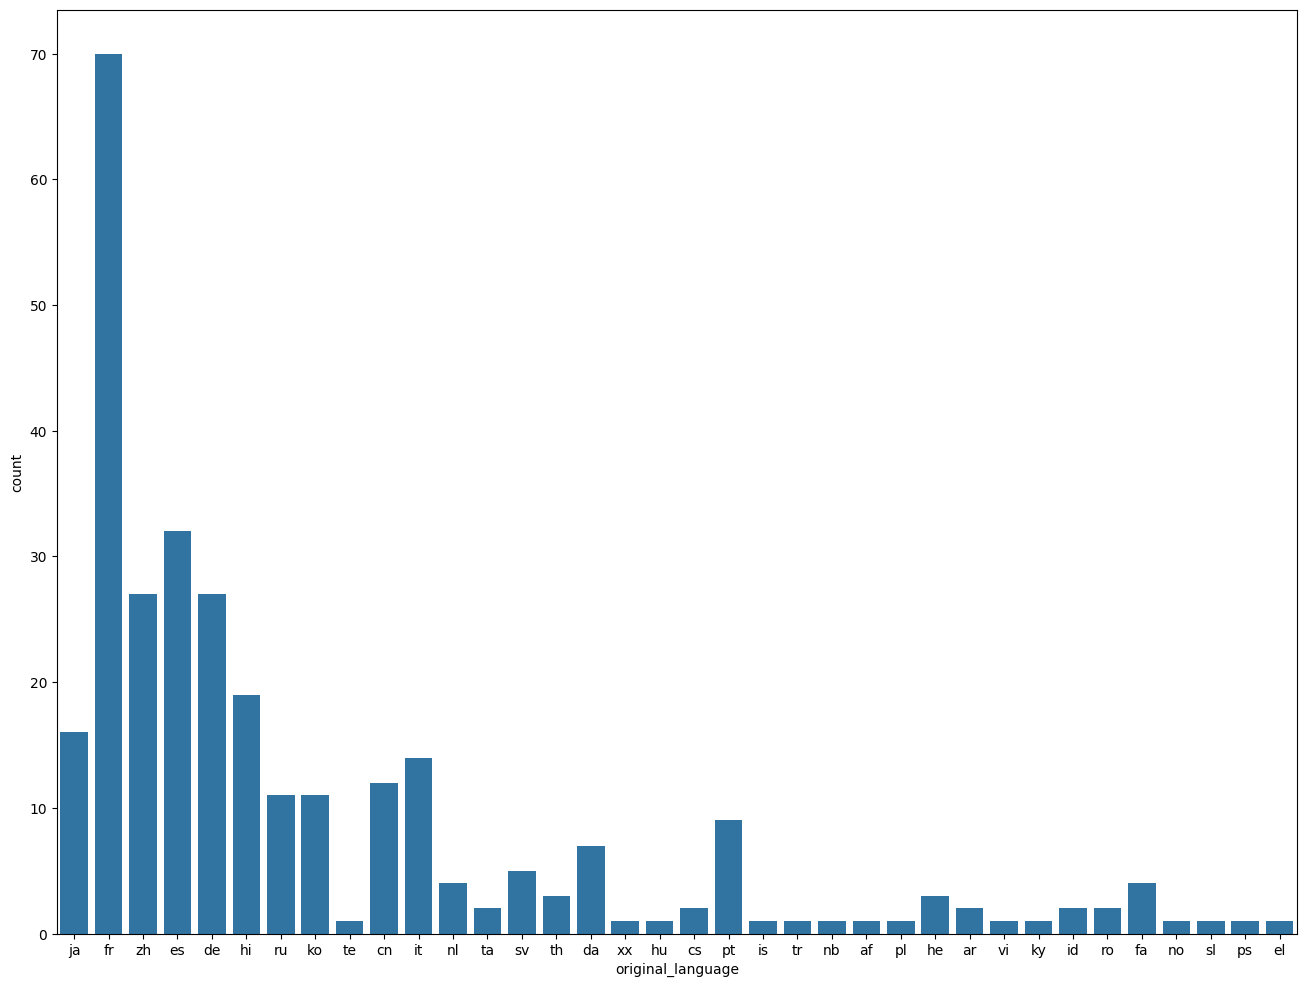

In [46]:
plt.figure(figsize=(16, 12))
sns.countplot(data=tmdb.query("original_language != 'en'"),
              x='original_language')
plt.show()

### Para saber mais: quando saber que um gráfico de pizza é eficaz?

Muitos(as) especialistas debatem sobre a praticidade dos gráficos de setores, como o gráfico de pizza e rosca, como ferramenta de visualização de dados.

Existem estudiosos(as) que se opõem a sua utilização, como [Edward Tufte](https://www.edwardtufte.com/bboard/q-and-a-fetch-msg?msg_id=00018S), um renomado teórico considerado pioneiro de visualização de dados e autor de vários trabalhos sobre o assunto; e [Cole Nussbaumer Knaflic](https://www.storytellingwithdata.com/blog/2011/07/death-to-pie-charts), escritora do "Storytelling com dados", uma das obras mais destacadas na área.

Apesar disso, esses gráficos são incorporados em nosso cotidiano devido à sua capacidade direta de apresentar informações e à sua facilidade de criação em diversas ferramentas de análise de dados.

É importante destacar que muitas pessoas também apontam aplicações práticas dos gráficos de pizza e rosca para situações específicas. O artigo, [When Pie Charts Are Okay (Seriously): Guidelines for Using Pie and Donut Charts](https://depictdatastudio.com/when-pie-charts-are-okay-seriously-guidelines-for-using-pie-and-donut-charts/), escrito por Ann K. Emery, destaca alguns cenários nos quais os gráficos de pizza e rosca podem ser utilizados:

    - Dados de categorias de gêneros homem/mulher/etc;
    - Quantidade ou porcentagem de respostas de pesquisas de sim/não;
    - Estudantes que concluíram o ensino médio a tempo ou não;
    - Outros dados binários/dicotômicos.

É evidente que a adequação de um gráfico de pizza depende muito do tipo de dado ou da maneira como desejamos comunicar nossas análises ao público. Assim, apresentaremos três pontos de atenção para evitar que nossa visualização de dados cause confusão na interpretação pelo público-alvo.

#### Nunca utilize gráficos 3D e explosão de fatias

Quanto mais **simples** e **direta** for a nossa visualização, menor será o esforço cognitivo exigido de nosso público para compreender os dados apresentados.

Os gráficos de pizza já possuem certa complexidade ao relacionar partes com o todo por meio de áreas de setores circulares. A inserção de elementos 3D adiciona uma camada de complexidade ao representar dados em volumes, que não são nada triviais para nossa análise. Além disso, a explosão de fatias desloca as fatias do centro, tornando ainda mais desafiadora a comparação entre elas, como ilustrado nos gráficos a seguir.

![3D](http://cdn3.gnarususercontent.com.br/3675-data-science-analise-exploratoria/Imagens%20das%20atividades/Aula04-img01.png)

![2D](http://cdn3.gnarususercontent.com.br/3675-data-science-analise-exploratoria/Imagens%20das%20atividades/Aula04-img02.png)

#### Quanto menos fatias, melhor

Nâo há um número ideal de fatias para uma pizza. No entanto, para garantir a máxima clareza, é suficiente utilizar entre duas ou três fatias para comunicar certos pontos ao nosso público.

À medida que o número de fatias aumenta, a visualização dos dados se torna mais complexa, levantando questionamentos sobre a adequação do uso de gráficos de setores. Frequentemente, a resposta é negativa, exigindo que consideremos outras formas de visualização, como gráficos de barras, colunas, linhas ou outras representações. Os exemplos abaixo demonstram os mesmos dados dispostos de maneiras distintas.

![População brasileiraXregiões](http://cdn3.gnarususercontent.com.br/3675-data-science-analise-exploratoria/Imagens%20das%20atividades/Aula04-img03.png)

![População brasileira do NordesteXOutros](http://cdn3.gnarususercontent.com.br/3675-data-science-analise-exploratoria/Imagens%20das%20atividades/Aula04-img04.png)

> Fonte: IBGE. Diretoria de Pesquisas - DPE - Coordenação de População e Indicadores Sociais - COPIS (apenas os dados)

#### Posicionamento dos rótulos

É ideal posicionar os rótulos próximos aos dados, evitando distrações que prejudiquem a leitura e interpretação dos dados. Um exemplo disso é o posicionamento da legenda, cuja distância pode afetar diretamente a interpretação da visualização. Quanto mais distante a legenda estiver do gráfico, mais difícil será a compreensão do visual, pois exigirá uma divisão da atenção entre a legenda e o gráfico, como mostrado nos exemplos abaixo:

![Legendas distantes](http://cdn3.gnarususercontent.com.br/3675-data-science-analise-exploratoria/Imagens%20das%20atividades/Aula04-img05.png)

![Legendas próximas](http://cdn3.gnarususercontent.com.br/3675-data-science-analise-exploratoria/Imagens%20das%20atividades/Aula04-img06.png)

---

Para concluir, os gráficos de setores tendem a ser mais compreensíveis quando utilizamos frações comuns, como um quarto e três quartos (25% vs. 75%) ou um terço e dois terços (33% vs. 67%).

### Para saber mais: Biblioteca Seaborn

Como estamos vendo ao longo deste curso, Seaborn é uma biblioteca de visualização de dados em Python que é baseada no Matplotlib. Ela fornece uma interface de alto nível para criar gráficos mais atrativos e com menor necessidade de ajustar os parâmetros de visualização. Seu principal objetivo é tornar a visualização de dados mais simples e esteticamente agradável, oferecendo uma ampla variedade de gráficos pré-contruídos e personalizáveis.

Com apenas algumas linhas de código, é possível criar gráficos complexos, como histogramas e boxplots, como aprendemos ao longo deste curso, e também gráficos de dispersão, gráficos de linhas, mapas de calor e muito mais. Além disso, a biblioteca Seaborn integra-se perfeitamente com Pandas, outra biblioteca essencial em ciência de dados, facilitando a visualização de conjuntos de dados.

Vamos trazer um exemplo de código explorando algumas de suas possibilidades. Logo abaixo, utilizamos a base do TMDB, que exploramos durante a aula, e filtramos os filmes nas línguas francesa, espanhola e alemã com valores válidos de receita (_revenue_) e orçamento (_budget_). Em sequência, criamos 3 gráficos de dispersão com retas de regressão linear (`lmplot()`) para cada língua:

```python
import pandas as pd
import seaborn as sns

# Importando a base de dados
tmdb = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/data-science-analise-exploratoria/main/Aula_0/tmdb_5000_movies.csv")

# Filtrando os dados para as colunas desejadas
dados = tmdb[['title', 'original_language', 'budget', 'revenue']]
linguas = ['fr', 'es', 'de']

# Mantendo dados com valores de receita e orçamento válidos e nas línguas desejadas (fr, es, de)
fr_es_de_com_revenue_e_budget = dados.query('revenue > 0 and budget > 0 and original_language == @linguas')

# Construindo o gráfico de dispersão mais a reta de regressão linear para cada caso
sns.lmplot(data=fr_es_de_com_revenue_e_budget,
           x='budget',
           y='revenue',
           col='original_language',
           hue='original_language',
           ci=None,
           height=4,
           scatter_kws=dict(s=30, alpha=0.5))
```

O gráfico gerado é o seguinte:

![gráfico](http://cdn3.gnarususercontent.com.br/3675-data-science-analise-exploratoria/Imagens%20das%20atividades/Aula05-img01.png)

Podemos notar diferenças entre as produções em cada uma das línguas, mostrando as tendências da relação entre o orçamento utilizado e a receita gerada pelos filmes. Seria necessário um número maior de filmes para cada uma delas para gerarmos melhores interpretações com os dados.

Sinta-se livre para observar e testar mais exemplos disponíveis na [documentação do Seaborn](https://seaborn.pydata.org/examples/index.html), e não deixe de continuar os estudos dentro deste curso e nos próximos para aprender mais sobre o potencial da visualização de dados em nossas análises.

## 05. Ajustando os visuais

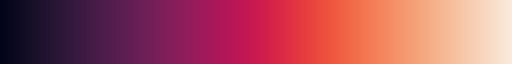

In [54]:
sns.color_palette('rocket', as_cmap=True)

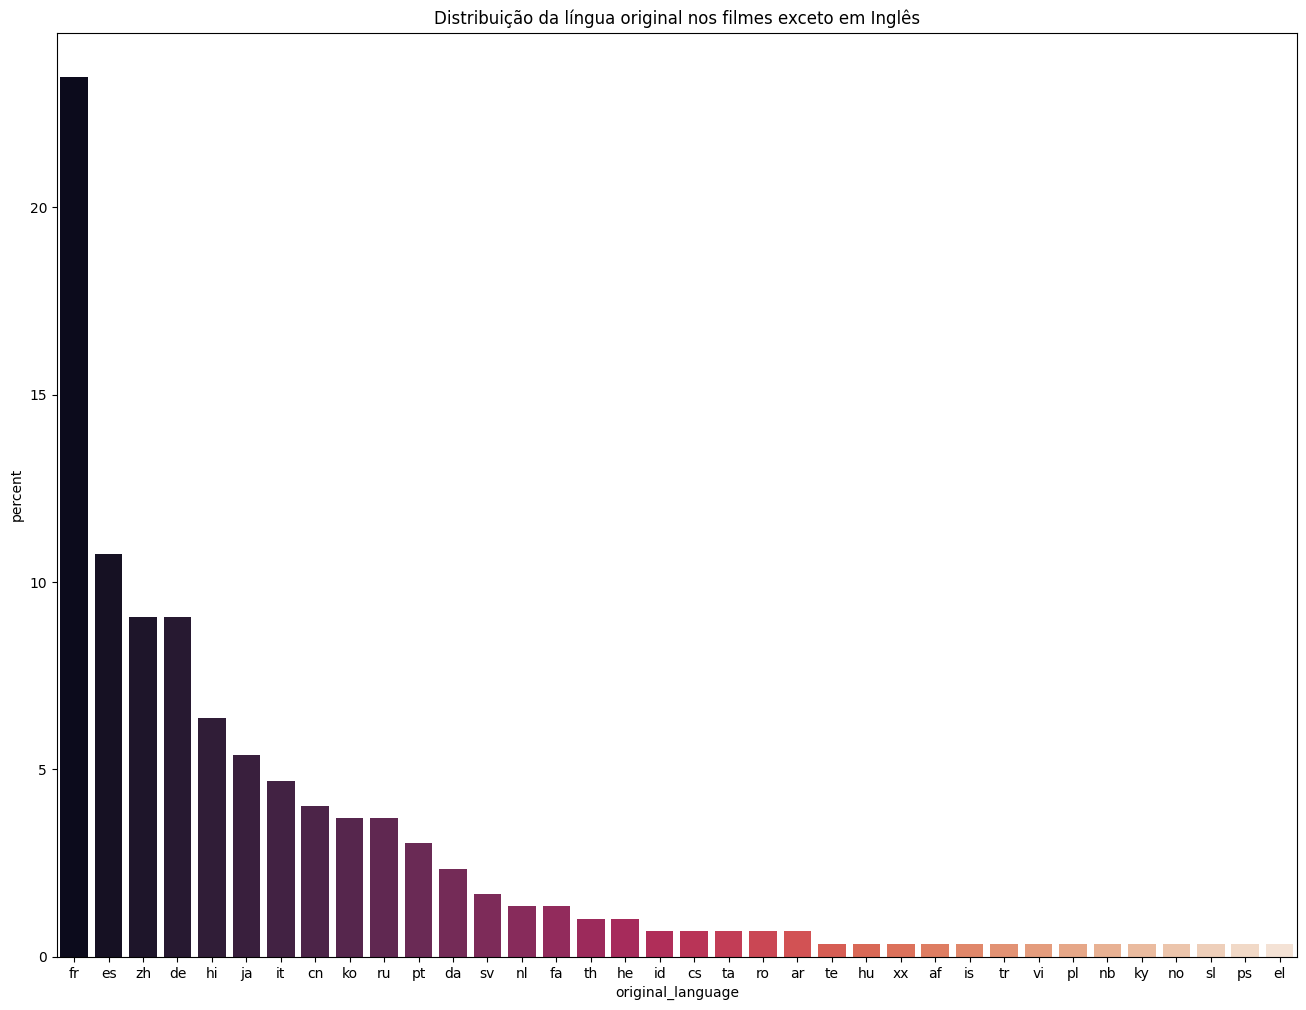

In [58]:
plt.figure(figsize=(16, 12))
sns.countplot(data=tmdb.query("original_language != 'en'"),
              order=total_de_outros_filmes_por_lingua.index,
              x='original_language',
              hue='original_language',
              hue_order=total_de_outros_filmes_por_lingua.index,
              palette='rocket',
              stat='percent')
plt.title(label='Distribuição da língua original nos filmes exceto em Inglês')
plt.show()

[Seaborn Color Palletes](https://seaborn.pydata.org/tutorial/color_palettes.html)

tmdb.query("original_language != 'en'")['original_language'].value_counts(normalize=True)

### Para saber mais: histograma e boxplot

Falamos bastante sobre o histograma e boxplot durante as nossas aulas e construímos estes visuais utilizando as bibliotecas do Python. Mas afinal o que são essas representações visuais?

#### Histograma

Um histograma é uma representação visual que mostra a distribuição dos dados em um dado intervalo por meio de colunas. Os dados são divididos em intervalos, chamados de 'bins', que apresentam quantas observações estão presentes naquela faixa de dados. Ele é amplamente utilizado para visualizar a distribuição de frequências ou contagens em um conjunto de dados.

Este tipo de gráfico é eficaz para mostrar a distribuição de variáveis discretas ou categorias em que a altura de cada barra indica a contagem ou proporção de observações naquela categoria. Isso facilita a identificação de tendências, como a concentração de observações em determinados intervalos, e ajuda a compreender também a distribuição geral dos dados.

Como vimos na aula, é importante termos atenção no equilíbrio entre o número apropriado de 'bins' e/ou a largura dos 'bins' para representação dos dados, pois 'bins' estreitos podem gerar ruídos por poucas observações em determinados intervalos e 'bins' largos podem descaracterizar a curva e reduzir a sensibilidade na variação das faixas.

#### Boxplot

O Boxplot, também conhecido como 'diagrama de caixa', é uma representação visual que apresenta a distribuição de um conjunto de dados por meio de uma série de estatísticas descritivas: quartis, mediana, mínimo e máximo.

Este tipo de gráfico auxilia na visualização da dispersão e centralidade dos dados, identificando assimetrias, outliers e variações nos dados.

## 06. Estatística dos dados

In [59]:
notas_do_toystory = notas.query('filmeId == 1')['nota']
notas_do_jumanji = notas.query('filmeId == 2')['nota']

media_do_toystory = notas_do_toystory.mean()
media_do_jumanji = notas_do_jumanji.mean()

print(media_do_toystory, media_do_jumanji)

3.9209302325581397 3.4318181818181817


In [60]:
mediana_do_toystory = notas_do_toystory.median()
mediana_do_jumanji = notas_do_jumanji.median()

print(mediana_do_toystory, mediana_do_jumanji)

4.0 3.5


In [62]:
import numpy as np

In [68]:
filme1 = [2.5] * 10 + [3.5] * 10
media_filme1 = np.mean(filme1)
mediana_filme1 = np.median(filme1)

filme2 = [5] * 10 + [1] * 10
media_filme2 = np.mean(filme2)
mediana_filme2 = np.median(filme2)

print('Filme 1:')
print(f'Média: {media_filme1}')
print(f'Mediana: {mediana_filme1}')

print('\nFilme 2:')
print(f'Média: {media_filme2}')
print(f'Mediana: {mediana_filme2}')

Filme 1:
Média: 3.0
Mediana: 3.0

Filme 2:
Média: 3.0
Mediana: 3.0


(array([10.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 10.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

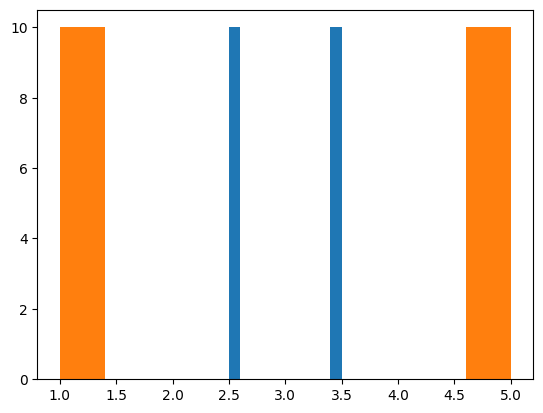

In [69]:
plt.hist(x=filme1)
plt.hist(x=filme2)

{'whiskers': [<matplotlib.lines.Line2D at 0x72749b0beff0>,
 'caps': [<matplotlib.lines.Line2D at 0x72749b0bd160>,
 'boxes': [<matplotlib.lines.Line2D at 0x72749b0bc5f0>,
 'medians': [<matplotlib.lines.Line2D at 0x72749b0bf4d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x72749b0bf320>,
 'means': []}

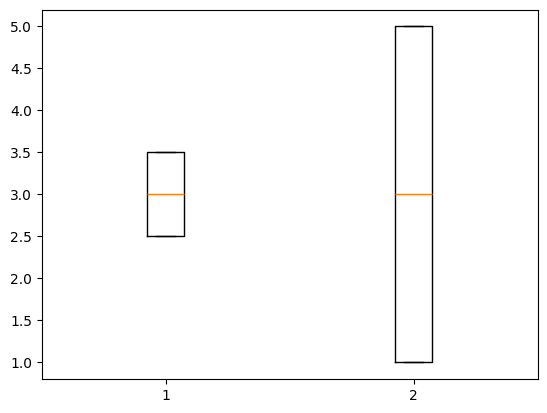

In [70]:
plt.boxplot(x=[filme1, filme2])

In [74]:
filme0 = [3.0] * 20
np.mean(filme0),  np.std(filme0)

(np.float64(3.0), np.float64(0.0))

In [75]:
np.std(filme1),  np.std(filme2)

(np.float64(0.5), np.float64(2.0))

### Para saber mais: desvio padrão

O desvio padrão é uma medida estatística que indica a dispersão ou variabilidade dos dados em relação à média. Ele representa o quão distantes os valores individuais estão da média do conjunto de dados. Quanto maior o desvio padrão, maior é a dispersão dos dados em torno da média; e quanto menor, menor é a dispersão.

O desvio padrão auxilia na compreensão da variabilidade de um conjunto de dados e avalia o quão representativa é a média. Ele nos fornece uma medida da consistência ou insconsistência dos dados em relação à média e é comumente utilizado para medir a confiança e a margem de erro em cálculos estatísticos, que você aprenderá um pouco mais nos próxmos cursos da formação.

#### Vamos para um exemplo?

Podemos notar o comportamento do desvio padrão observando o código abaixo que cria um DataFrame que contém a quantidade de visitas em um website por dia da semana em duas semanas:

```python
import pandas as pd
import numpy as np

# Criando DataFrame de exemplo
dados = np.array([[100, 120, 90, 110, 130], [80, 150, 70, 140, 60]])

df = pd.DataFrame(dados
                  index=['Semana 1', 'Semana 2'],
                  columns=['Segunda', 'Terça', 'Quarta', 'Quinta', 'Sexta', 'Sábado', 'Domingo'])

# Calculando o desvio padrão das visitas por semana
desvio_padrao_semana1 = df.loc['Semana 1'].std()  
desvio_padrao_semana2 = df.loc['Semana 2'].std()  

print(df)
print('\nDesvio Padrão da Semana 1:', desvio_padrao_semana1.round(2))
print('Desvio Padrão da Semana 2:', desvio_padrao_semana2.round(2))
```

Observe abaixo a saída desse código:

```python
                  Segunda  	Terça  		Quarta  	Quinta  	Sexta
Semana 1      	100    		120      	90     		110    		130
Semana 2       	80    		150      	70     		140     		60

Desvio Padrão da Semana 1: 15.81
Desvio Padrão da Semana 2: 41.83
```

Lendo a resposta gerada pelo código, percebemos que o desvio padrão da **Semana 2** foi maior que o da **Semana 1**. Por quê? Sabendo que estamos trabalhando com dados de uma mesma natureza (quantidade de visitas), isso indica que possuímos uma maior dispersão dos dados de visitas na **Semana 2** em relação à média semanal (100 visitas), enquanto que na **Semana 1** possuímos uma menor dispersão da quantidade de visitas de acordo com a mesma semana (110 visitas).

Trazendo para ciência de dados, podemos interpretar que houve maior instabilidade ou flutuação no número de visitas em diferentes dias da semana na **Semana 2**, o que pode aumentar o interesse em analisar o que pode ter ocorrido e como planejar um maior engajamento para a semana inteira.

{'whiskers': [<matplotlib.lines.Line2D at 0x72749b2c4620>,
 'caps': [<matplotlib.lines.Line2D at 0x72749b26c4a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x72749b2c4230>,
 'medians': [<matplotlib.lines.Line2D at 0x72749b26d0a0>,
 'fliers': [<matplotlib.lines.Line2D at 0x72749b26cbc0>,
 'means': []}

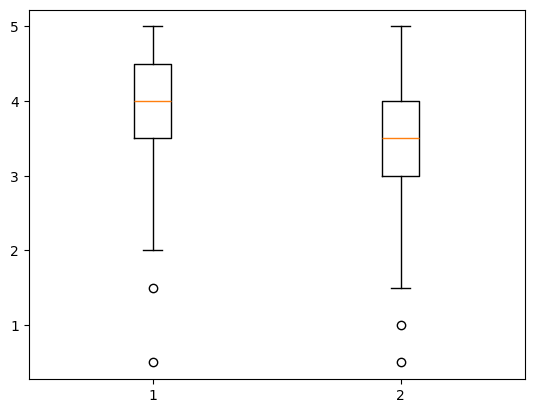

In [76]:
plt.boxplot(x=[notas_do_toystory, notas_do_jumanji])

<Axes: ylabel='nota'>

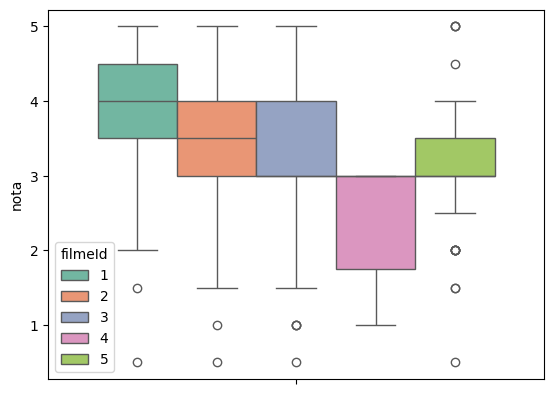

In [86]:
sns.boxplot(data=notas.query('filmeId < 6'),
            hue='filmeId',
            y='nota',
            palette='Set2')

In [87]:
notas.groupby(by='filmeId').count()

,usuarioId,nota,momento
filmeId,,,
1,215,215,215
2,110,110,110
3,52,52,52
4,7,7,7
5,49,49,49
...,...,...,...
193581,1,1,1
193583,1,1,1
193585,1,1,1


In [88]:
notas['filmeId'].value_counts().tail()

filmeId
138966    1
140162    1
140737    1
140816    1
121169    1
Name: count, dtype: int64

In [90]:
notas.groupby(by='filmeId').count().query('nota == 1')

,usuarioId,nota,momento
filmeId,,,
49,1,1,1
55,1,1,1
77,1,1,1
83,1,1,1
96,1,1,1
...,...,...,...
193581,1,1,1
193583,1,1,1
193585,1,1,1


### Para saber mais: Kaggle

Uma das ferramentas que podemos utilizar para explorar os dados em diversos contextos da ciência de dados é o [Kaggle](https://www.kaggle.com/). Ele é uma plataforma online que conecta entusiastas de ciência de dados e aprendizado de máquina, oferencendo um vasto repositório de competições, conjuntos de dados, notebooks, e uma comunidade ativa para troca de conhecimento e experiências. Este ambiente permite que as pessoas explorem e participem de desafios propostos por empresas e organizações, os quais vão desde previsão de vendas até diagnósticos médicos avançados, oferecendo prêmios para as melhores soluções.

Para estudantes e profissionais da área de ciência de dados, o Kaggle atua como uma ferramenta de aprendizado de mão na massa, permitindo aplicar conceitos aprendidos na área por meio de problemas reais. Podemos acessar uma série de notebooks disponíveis na plataforma compartilhados pela comunidade partindo da análise exploratória com o storytelling dos dados aos modelos de machine learning documentados passo a passo.

Além disso, os desafios do Kaggle possibilitam às pessoas estudantes testar e aplicar o que vem aprendendo em cenários competitivos, com feedback sobre a performance de seus modelos através dos rankings. Essa interação direta com o problemas do mundo real e a possibilidade de ver como outros participantes abordaram o mesmo problema são inestimáveis para o desenvolvimento de habilidades práticas em ciência de dados.

[Video Game Sales with Ratings](https://www.kaggle.com/datasets/rush4ratio/video-game-sales-with-ratings)